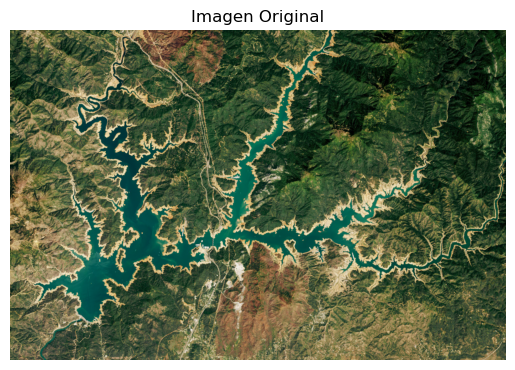

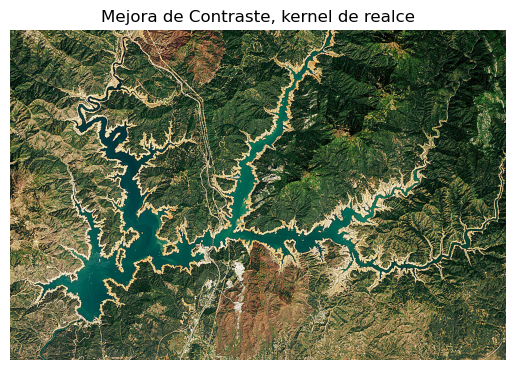

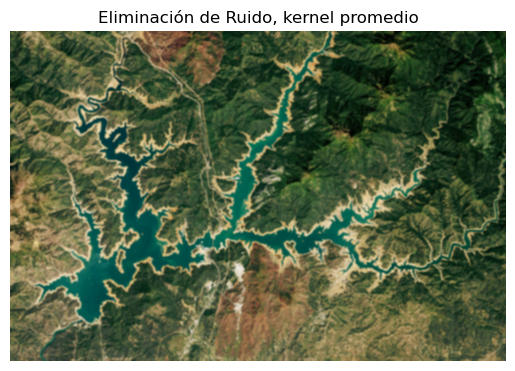

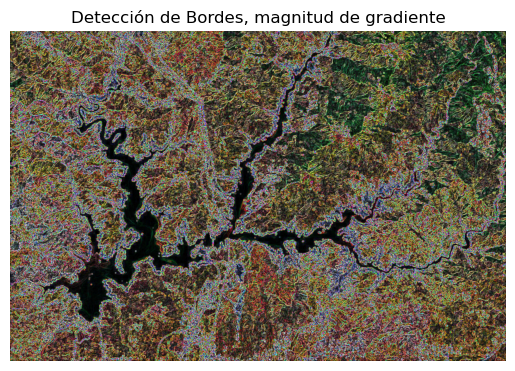

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para mostrar la imagen
def mostrar_imagen(titulo, imagen):
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Leer la imagen
imagen = cv2.imread('shasta_oli2_20220424_lrg.jpg', cv2.IMREAD_COLOR)

# 1. Mejora de contraste utilizando un kernel de realce
# Kernel de realce
kernel_realce = np.array([[0, -1, 0],
                          [-1, 5,-1],
                          [0, -1, 0]])

imagen_mejorada_contraste = cv2.filter2D(imagen, -1, kernel_realce)

# 2. Eliminación de ruido usando un filtro promedio
# Kernel de filtro promedio
kernel_promedio = np.ones((5,5),np.float32)/25

imagen_suavizada = cv2.filter2D(imagen, -1, kernel_promedio)

# 3. Detección de bordes usando el filtro de Sobel
# Kernel de Sobel en la dirección x
sobelx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)

# Magnitud del gradiente
bordes = cv2.magnitude(sobelx, sobely)
bordes = np.uint8(bordes)

# Mostrar resultados
mostrar_imagen('Imagen Original', imagen)
mostrar_imagen('Mejora de Contraste, kernel de realce', imagen_mejorada_contraste)
mostrar_imagen('Eliminación de Ruido, kernel promedio', imagen_suavizada)
mostrar_imagen('Detección de Bordes, magnitud de gradiente', bordes)

# Guardar resultados
cv2.imwrite('eliminacion_ruido.jpg', imagen_suavizada)



In [25]:

# Definir el kernel
kernel = np.ones((5, 5), np.uint8)

# Visualizar el kernel
#1 1 1 1 1
#1 1 1 1 1
#1 1 1 1 1
#1 1 1 1 1
#1 1 1 1 1

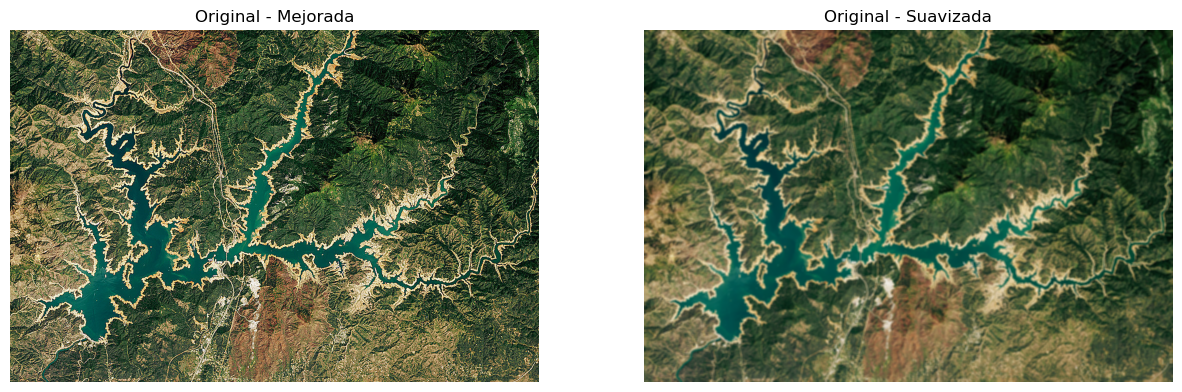

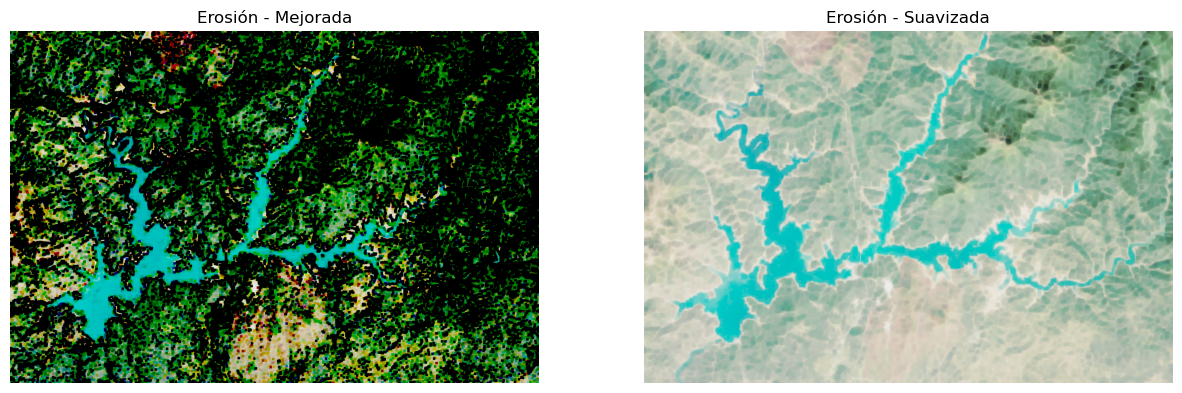

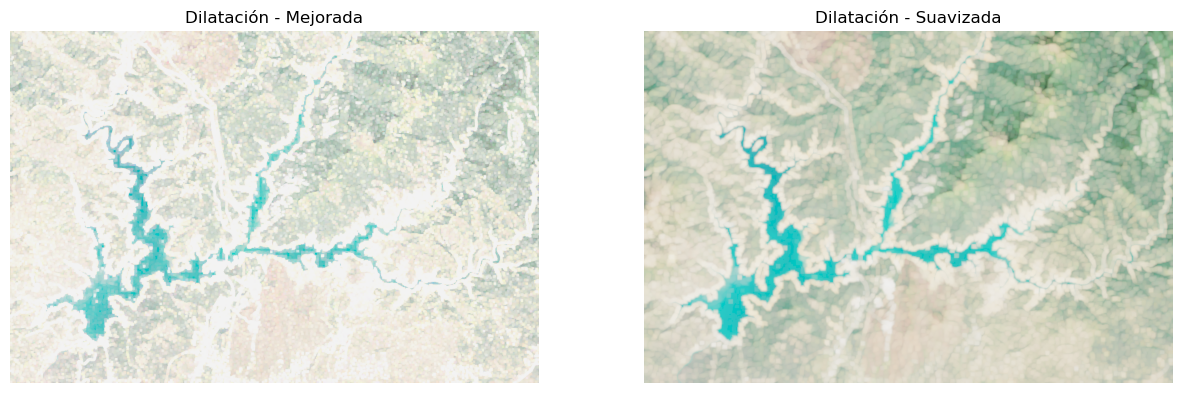

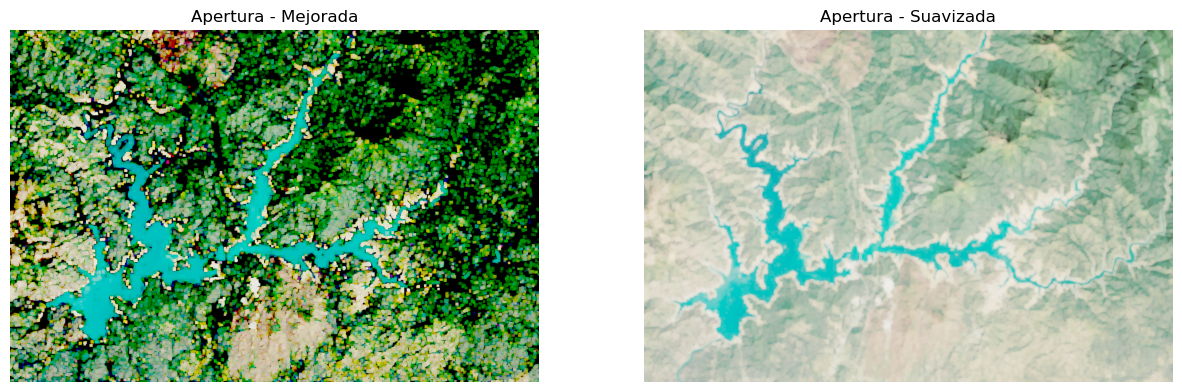

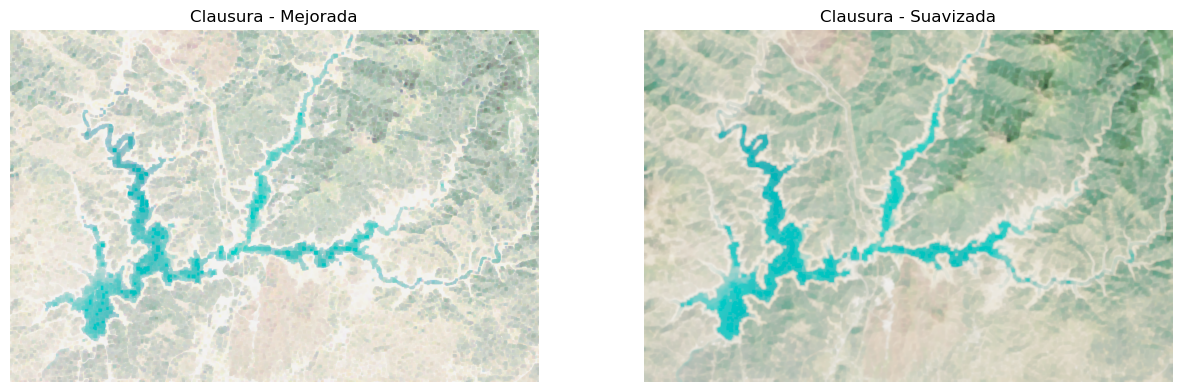

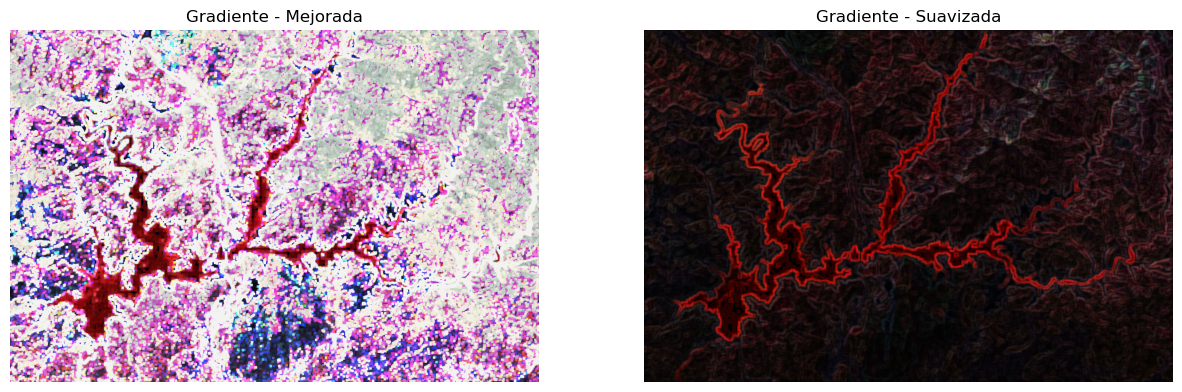

True

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Función para mostrar imágenes lado a lado
def mostrar_imagenes_lado_a_lado(titulo1, imagen1, titulo2, imagen2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    ax1.set_title(titulo1)
    #ax1.imshow(imagen1, cmap='gray')
    ax1.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax2.set_title(titulo2)
    #ax2.imshow(imagen2, cmap='gray')
    ax2.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
    ax2.axis('off')
    plt.show()
    
# Función para aplicar filtro logarítmico
def modificacion_logaritmica(imagenlog, c, sigma):
    # Aplicar la transformación logarítmica a cada píxel de la imagen
    imagen_modificada = c * np.log(1 + (np.exp(sigma) - 1) * imagenlog)

    # Asegurarse de que los valores estén en el rango [0, 255]
    imagen_modificada = np.clip(imagen_modificada, 0, 255).astype(np.uint8)

    return imagen_modificada

# Función para aplicar tratamiento a una imagen
def aplicar_tratamiento(imagen):

    # Aplicar filtro logarítmico
    c = 40
    sigma = 1
    imagen_log = modificacion_logaritmica(imagen, c, sigma)
    
    # Definir un elemento estructurante (kernel)
    kernel = np.ones((5, 5), np.uint8)
    
    # Erosión
    erosion = cv2.erode(imagen_log, kernel, iterations=1)
    
    # Dilatación
    dilatacion = cv2.dilate(imagen_log, kernel, iterations=1)
    
    # Apertura
    opening = cv2.morphologyEx(imagen_log, cv2.MORPH_OPEN, kernel)
    
    # Clausura
    closing = cv2.morphologyEx(imagen_log, cv2.MORPH_CLOSE, kernel)
    
    # Gradiente morfológico
    gradient = cv2.morphologyEx(imagen_log, cv2.MORPH_GRADIENT, kernel)
    
    return imagen_log, erosion, dilatacion, opening, closing, gradient


# Aplicar tratamiento a ambas imágenes
imagen_log_mejorada,erosion_mejorada, dilatacion_mejorada, opening_mejorada, closing_mejorada, gradient_mejorada = aplicar_tratamiento(imagen_mejorada_contraste)
imagen_log_suavizada, erosion_suavizada, dilatacion_suavizada, opening_suavizada, closing_suavizada, gradient_suavizada = aplicar_tratamiento(imagen_suavizada)

# Mostrar los resultados lado a lado
mostrar_imagenes_lado_a_lado('Original - Mejorada', imagen_mejorada_contraste, 'Original - Suavizada', imagen_suavizada)
mostrar_imagenes_lado_a_lado('Erosión - Mejorada', erosion_mejorada, 'Erosión - Suavizada', erosion_suavizada)
mostrar_imagenes_lado_a_lado('Dilatación - Mejorada', dilatacion_mejorada, 'Dilatación - Suavizada', dilatacion_suavizada)
mostrar_imagenes_lado_a_lado('Apertura - Mejorada', opening_mejorada, 'Apertura - Suavizada', opening_suavizada)
mostrar_imagenes_lado_a_lado('Clausura - Mejorada', closing_mejorada, 'Clausura - Suavizada', closing_suavizada)
mostrar_imagenes_lado_a_lado('Gradiente - Mejorada', gradient_mejorada, 'Gradiente - Suavizada', gradient_suavizada)
cv2.imwrite('log1.jpg', imagen_log_suavizada)
cv2.imwrite('open1.jpg', opening_suavizada)

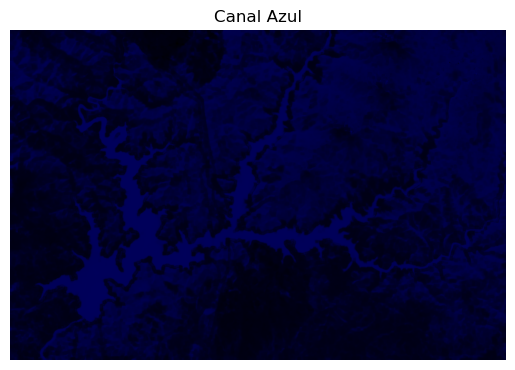

True

In [27]:
# Convertir la imagen a espacio de color HSV
imagen_lab = cv2.cvtColor(opening_suavizada, cv2.COLOR_BGR2HSV)
# Separar los canales de color
B, G, R = cv2.split(imagen_lab)

# Crear una imagen solo con el canal azul
imagen_azul = cv2.merge([B, np.zeros_like(G), np.zeros_like(R)])


# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen_azul, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Canal Azul')
plt.show()
cv2.imwrite('canalazul1.jpg', imagen_azul)

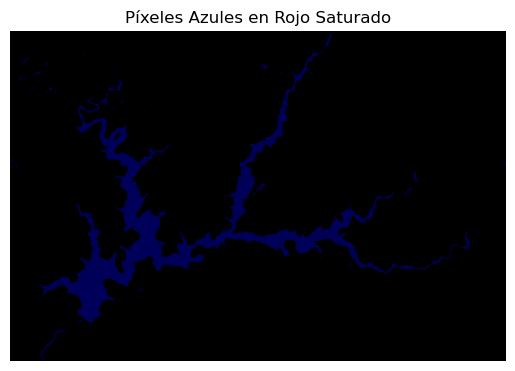

True

In [28]:
# Convertir la imagen a espacio de color HSV
imagen_hsv = cv2.cvtColor(imagen_azul, cv2.COLOR_BGR2HSV)

# Definir los rangos de color azul en HSV
azul_bajo = np.array([0, 81, 81])     # H: 90 (azul), S: 50 (bajo), V: 50 (bajo)
azul_alto = np.array([190, 255, 255]) # H: 130 (verde-azul), S: 255 (alto), V: 255 (alto)

# Crear una máscara de los píxeles azules
mascara_azul = cv2.inRange(imagen_hsv, azul_bajo, azul_alto)

# Ajustar la saturación de los píxeles azules para que se vean en rojo saturado
imagen_hsv[:,:,1] = 255  # Establecer la saturación máxima para los píxeles azules

# Aplicar la máscara para obtener solo los píxeles azules
imagen_azul2 = cv2.bitwise_and(imagen_hsv, imagen_hsv, mask=mascara_azul)

# Convertir la imagen de nuevo al espacio de color BGR
imagen_rojo_saturado = cv2.cvtColor(imagen_azul2, cv2.COLOR_HSV2BGR)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen_rojo_saturado, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Píxeles Azules en Rojo Saturado')
plt.show()

cv2.imwrite('ajusteazules1.jpg', imagen_rojo_saturado)

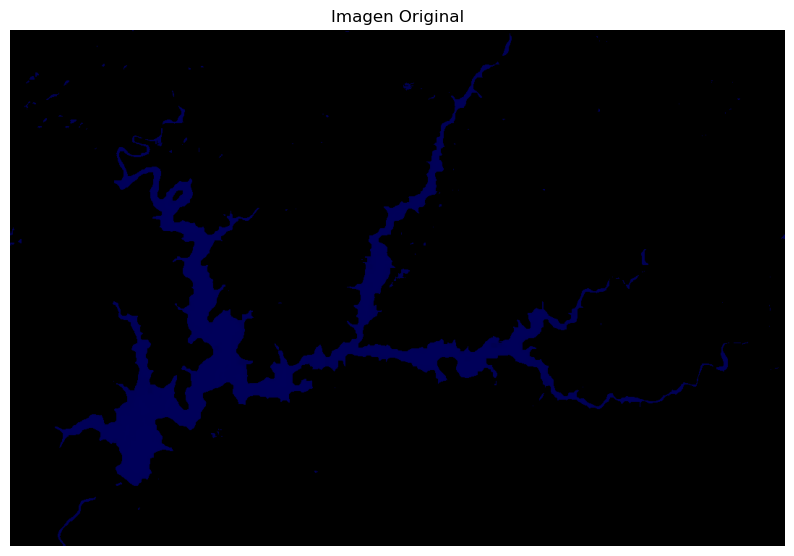

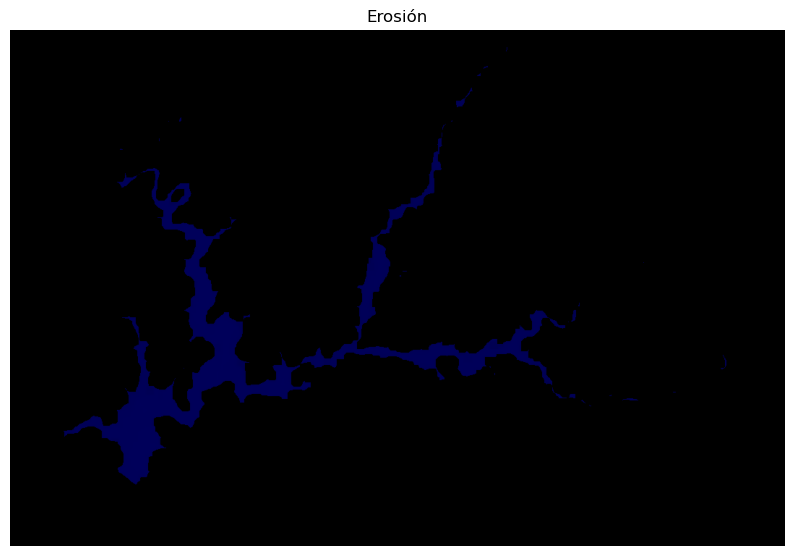

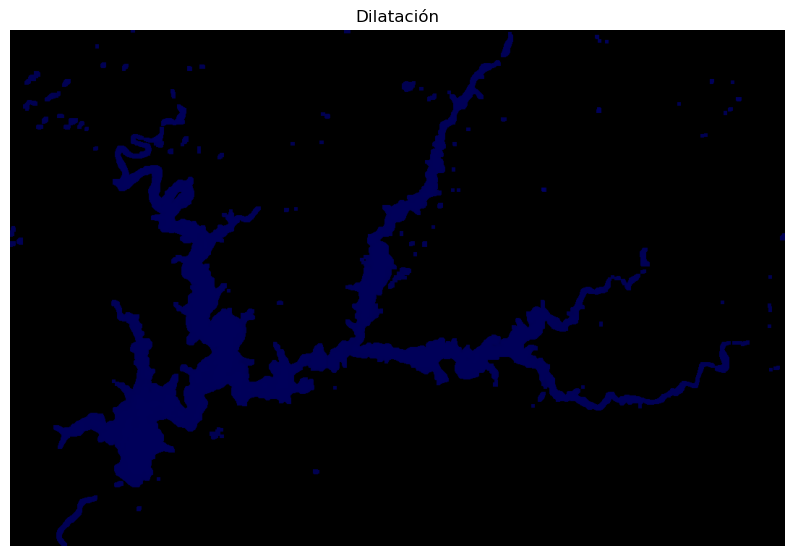

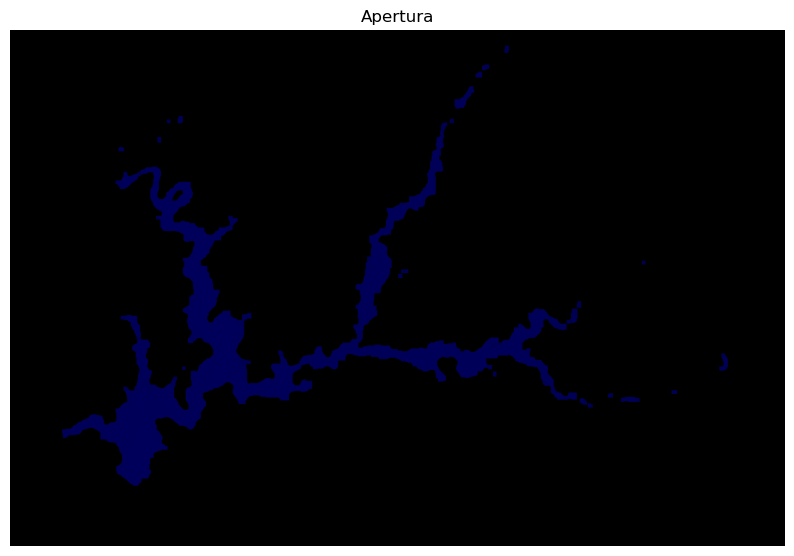

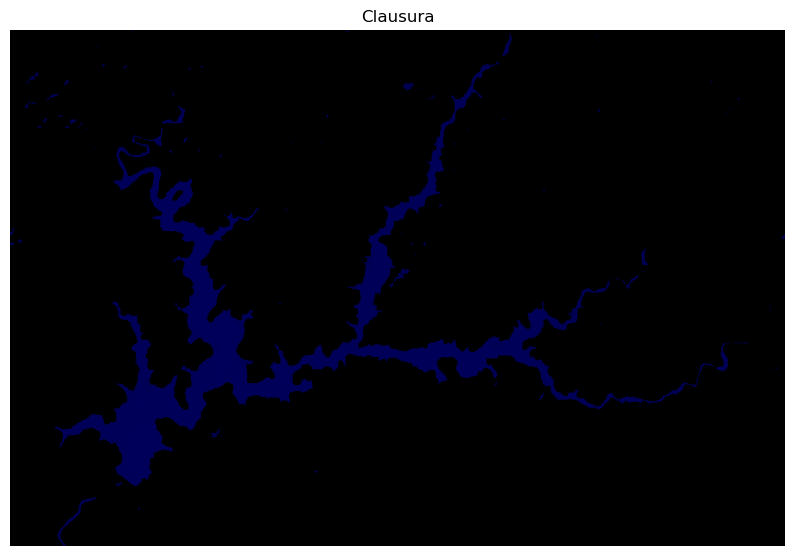

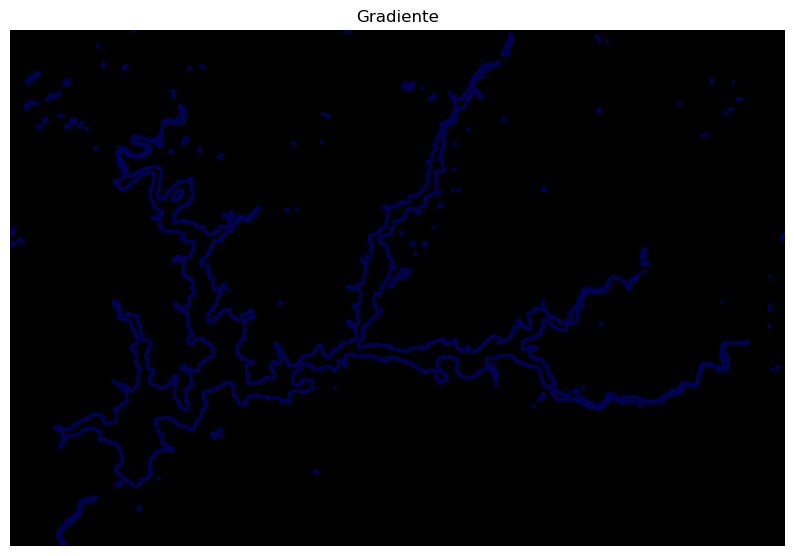

True

In [29]:
# Función para mostrar imágenes
def mostrar_imagen(titulo, imagen):
    plt.figure(figsize=(10, 10))
    plt.title(titulo)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Binarizar la imagen utilizando un umbral
#_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Definir un elemento estructurante (kernel)
kernel = np.ones((5, 5), np.uint8)

# Erosión
erosion = cv2.erode(imagen_rojo_saturado, kernel, iterations=1)

# Dilatación
dilatation = cv2.dilate(imagen_rojo_saturado, kernel, iterations=1)

# Apertura (erosión seguida de dilatación)
opening = cv2.morphologyEx(imagen_rojo_saturado, cv2.MORPH_OPEN, kernel)

# Clausura (dilatación seguida de erosión)
closing = cv2.morphologyEx(imagen_rojo_saturado, cv2.MORPH_CLOSE, kernel)

# Gradiente morfológico (diferencia entre dilatación y erosión)
gradient = cv2.morphologyEx(imagen_rojo_saturado, cv2.MORPH_GRADIENT, kernel)

# Mostrar los resultados
mostrar_imagen('Imagen Original', imagen_rojo_saturado)
mostrar_imagen('Erosión', erosion)
mostrar_imagen('Dilatación', dilatation)
mostrar_imagen('Apertura', opening)
mostrar_imagen('Clausura', closing)
mostrar_imagen('Gradiente', gradient)

cv2.imwrite('final2.jpg', gradient)

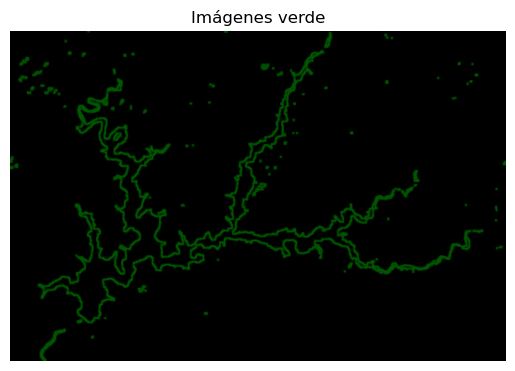

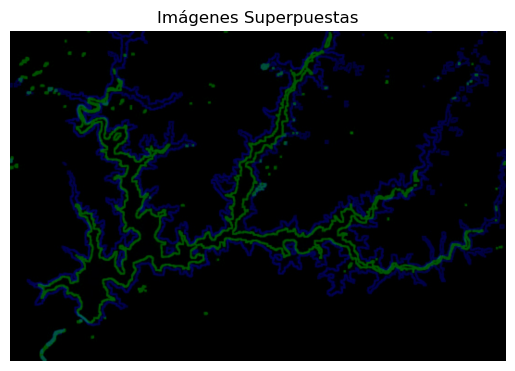

True

In [30]:

# Cargar las dos imágenes
imagen1 = cv2.imread('final1.jpg')
imagen2 = cv2.imread('final2.jpg')


# Obtener dimensiones de la imagen
alto, ancho = imagen2.shape[:2]

# Iterar sobre cada píxel
for y in range(alto):
    for x in range(ancho):
        # Si el píxel es azul (tiene valor 255 en el canal azul)
        if imagen2[y, x, 0] > 0:
            # Cambiar a verde
            imagen2[y, x] = [0, imagen2[y, x, 0], 0]


# Superponer las imágenes sumando las matrices de píxeles
imagen_superpuesta = cv2.add(imagen1, imagen2)


# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imágenes verde')
plt.show()

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen_superpuesta, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imágenes Superpuestas')
plt.show()


cv2.imwrite('finalCOMB.jpg',imagen_superpuesta)